# Simple Visualizations of Data

Just like in our first notebook, we have to load yt and then some data.

In [2]:
import yt

For this notebook, we'll load up a cosmology dataset.

In [3]:
ds = yt.load_sample("enzo_tiny_cosmology")
print ("Redshift =", ds.current_redshift)

yt : [INFO     ] 2021-06-24 12:31:08,177 Sample dataset found in '/Users/yilinxia/Desktop/DXL/yt/enzo_tiny_cosmology'
yt : [INFO     ] 2021-06-24 12:31:08,300 Parameters: current_time              = 230.66527489234
yt : [INFO     ] 2021-06-24 12:31:08,301 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2021-06-24 12:31:08,301 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2021-06-24 12:31:08,303 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2021-06-24 12:31:08,304 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2021-06-24 12:31:08,305 Parameters: current_redshift          = -2.7810863612032e-09
yt : [INFO     ] 2021-06-24 12:31:08,305 Parameters: omega_lambda              = 0.727
yt : [INFO     ] 2021-06-24 12:31:08,306 Parameters: omega_matter              = 0.273
yt : [INFO     ] 2021-06-24 12:31:08,307 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2021-06-24 12:31:08,308 Parameters: hubble_const

Redshift = -2.7810863612032e-09


In the terms that yt uses, a projection is a line integral through the domain.  This can either be unweighted (in which case a column density is returned) or weighted, in which case an average value is returned.  Projections are, like all other data objects in yt, full-fledged data objects that churn through data and present that to you.  However, we also provide a simple method of creating Projections and plotting them in a single step.  This is called a Plot Window, here specifically known as a `ProjectionPlot`.  One thing to note is that in yt, we project all the way through the entire domain at a single time.  This means that the first call to projecting can be somewhat time consuming, but panning, zooming and plotting are all quite fast.

yt is designed to make it easy to make nice plots and straightforward to modify those plots directly.  The cookbook in the documentation includes detailed examples of this.

Parsing Hierarchy : 100%|█████████▉| 210/211 [00:00<00:00, 1624.06it/s]
yt : [INFO     ] 2021-06-24 12:31:08,525 Gathering a field list (this may take a moment.)
yt : [INFO     ] 2021-06-24 12:31:10,409 Projection completed
yt : [INFO     ] 2021-06-24 12:31:10,410 xlim = 0.000000 1.000000
yt : [INFO     ] 2021-06-24 12:31:10,410 ylim = 0.000000 1.000000
yt : [INFO     ] 2021-06-24 12:31:10,412 xlim = 0.000000 1.000000
yt : [INFO     ] 2021-06-24 12:31:10,413 ylim = 0.000000 1.000000
yt : [INFO     ] 2021-06-24 12:31:10,415 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



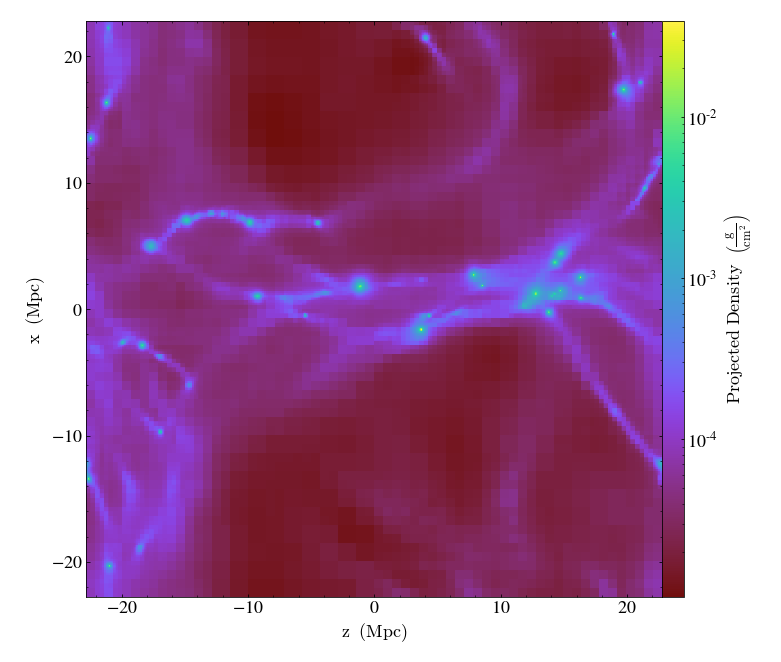

In [4]:
p = yt.ProjectionPlot(ds, "y", ("gas", "density"))
p.show()

In [5]:
help (yt.ProjectionPlot)

Help on class ProjectionPlot in module yt.visualization.plot_window:

class ProjectionPlot(PWViewerMPL)
 |  ProjectionPlot(ds, axis, fields, center='c', width=None, axes_unit=None, weight_field=None, max_level=None, origin='center-window', right_handed=True, fontsize=18, field_parameters=None, data_source=None, method='integrate', proj_style=None, window_size=8.0, buff_size=(800, 800), aspect=None)
 |  
 |  Creates a projection plot from a dataset
 |  
 |  Given a ds object, an axis to project along, and a field name
 |  string, this will return a PWViewerMPL object containing
 |  the plot.
 |  
 |  The plot can be updated using one of the many helper functions
 |  defined in PlotWindow.
 |  
 |  Parameters
 |  ----------
 |  ds : `Dataset`
 |      This is the dataset object corresponding to the
 |      simulation output to be plotted.
 |  axis : int or one of 'x', 'y', 'z'
 |       An int corresponding to the axis to slice along (0=x, 1=y, 2=z)
 |       or the axis name itself
 |  fie

The `show` command simply sends the plot to the IPython notebook.  You can also call `p.save()` which will save the plot to the file system.  This function accepts an argument, which will be prepended to the filename and can be used to name it based on the width or to supply a location.

Now we'll zoom and pan a bit.


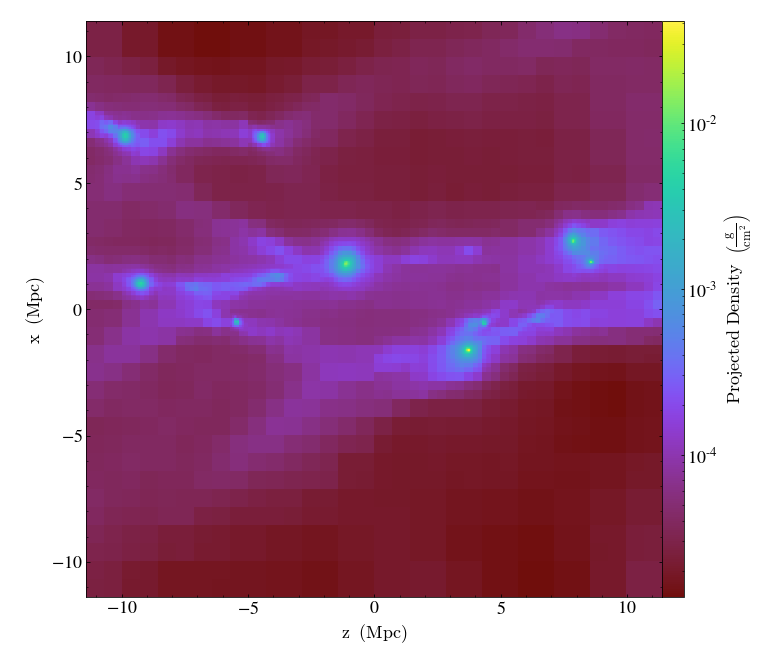

In [6]:
p.zoom(2.0)


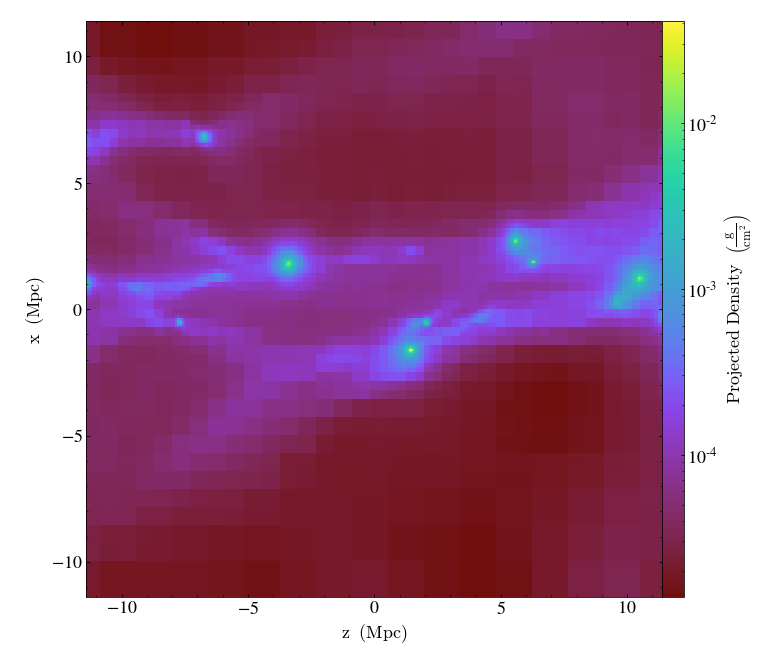

In [7]:
p.pan_rel((0.1, 0.0))


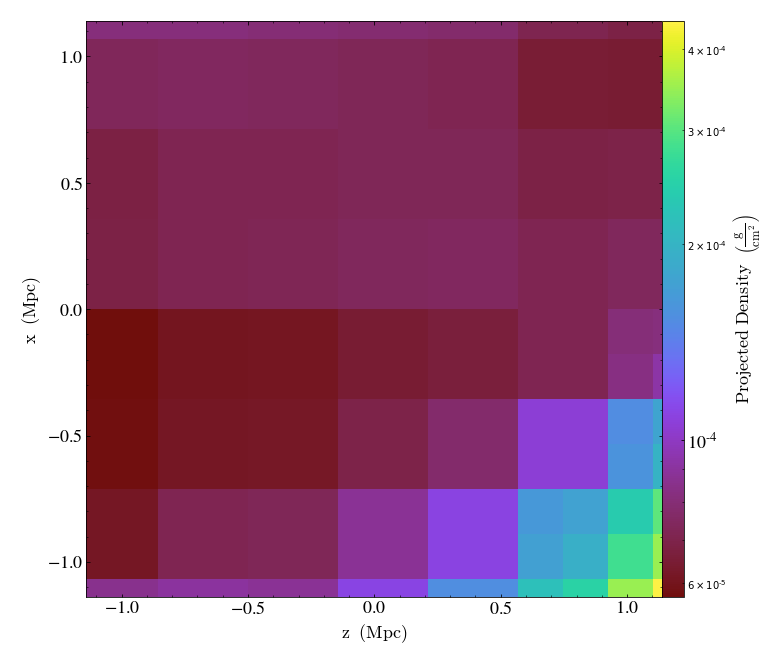

In [8]:
p.zoom(10.0)


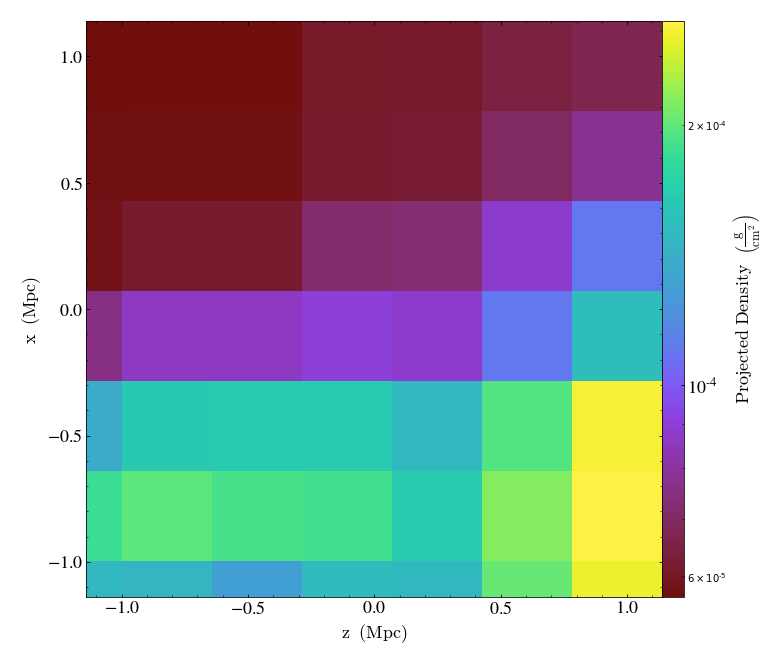

In [9]:
p.pan_rel((-0.25, -0.5))


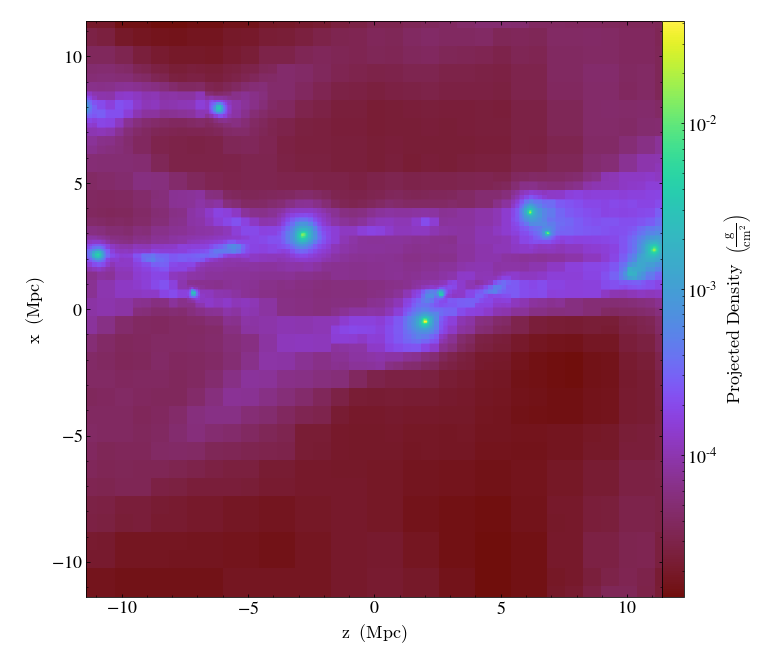

In [10]:
p.zoom(0.1)

If we specify multiple fields, each time we call `show` we get multiple plots back.  Same for `save`!

yt : [INFO     ] 2021-06-24 12:31:14,264 Projection completed
yt : [INFO     ] 2021-06-24 12:31:14,264 xlim = 0.000000 1.000000
yt : [INFO     ] 2021-06-24 12:31:14,265 ylim = 0.000000 1.000000
yt : [INFO     ] 2021-06-24 12:31:14,266 xlim = 0.000000 1.000000
yt : [INFO     ] 2021-06-24 12:31:14,266 ylim = 0.000000 1.000000
yt : [INFO     ] 2021-06-24 12:31:14,268 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800
yt : [INFO     ] 2021-06-24 12:31:14,274 Making a fixed resolution buffer of (('gas', 'temperature')) 800 by 800



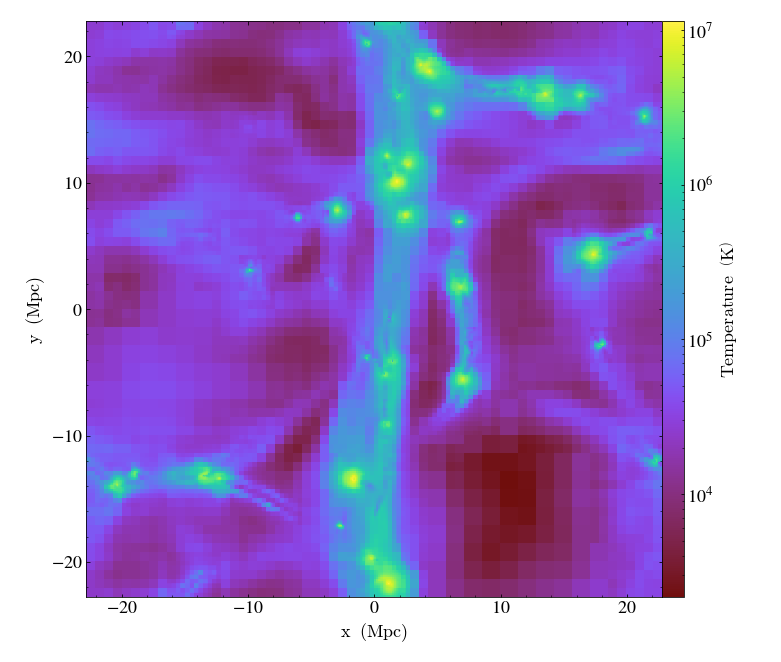
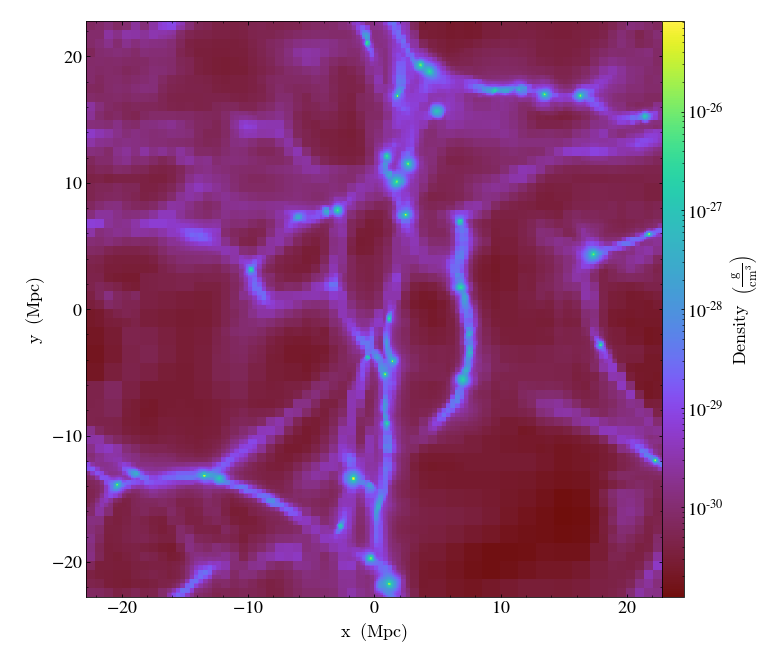

In [11]:
p = yt.ProjectionPlot(ds, "z", [("gas", "density"), ("gas", "temperature")], weight_field=("gas", "density"))
p.show()

We can adjust the colormap on a field-by-field basis.


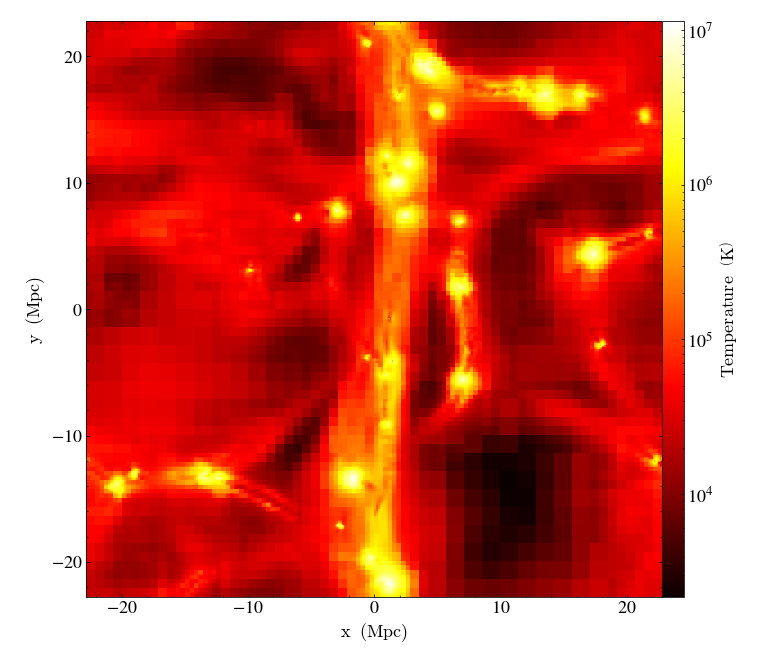
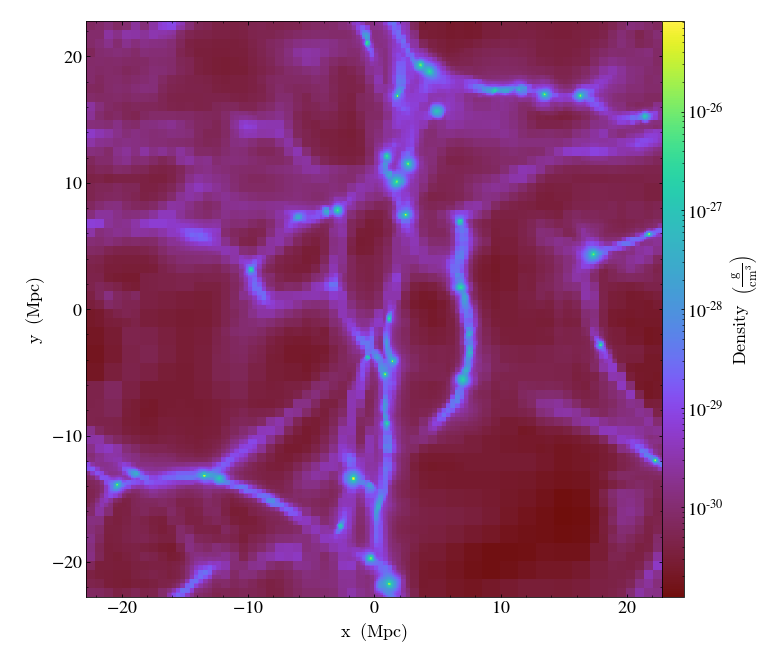

In [12]:
p.set_cmap(("gas", "temperature"), "hot")

And, we can re-center the plot on different locations.  One possible use of this would be to make a single `ProjectionPlot` which you move around to look at different regions in your simulation, saving at each one.

yt : [INFO     ] 2021-06-24 12:31:16,449 max value is 2.56902e-25 at 78089730664872015101427712.0000000000000000 93336802087564701935337472.0000000000000000 120809002849173156896178176.0000000000000000
yt : [INFO     ] 2021-06-24 12:31:16,450 xlim = 0.055176 1.055176
yt : [INFO     ] 2021-06-24 12:31:16,451 ylim = 0.163574 1.163574
yt : [INFO     ] 2021-06-24 12:31:16,453 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800
yt : [INFO     ] 2021-06-24 12:31:16,459 Making a fixed resolution buffer of (('gas', 'temperature')) 800 by 800



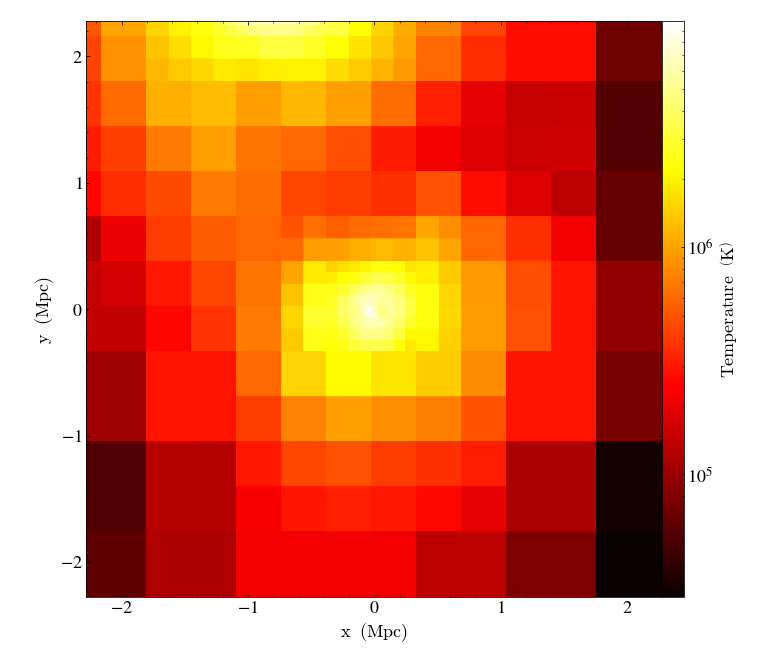
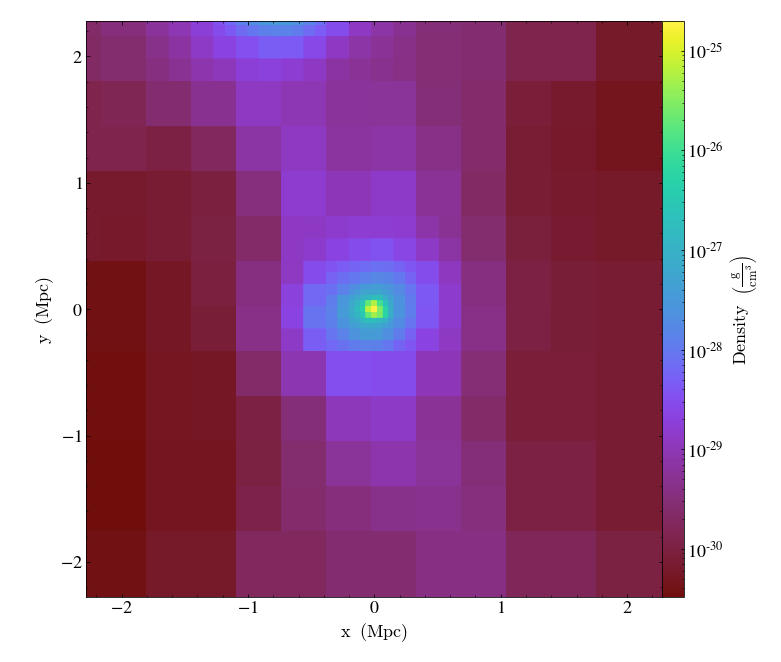

In [13]:
v, c = ds.find_max(("gas", "density"))
p.set_center((c[0], c[1]))
p.zoom(10)

Okay, let's load up a bigger simulation (from `Enzo_64` this time) and make a slice plot.

In [14]:
ds = yt.load_sample("Enzo_64/DD0043/data0043")
s = yt.SlicePlot(ds, "z", [("gas", "density"), ("gas", "velocity_magnitude")], center="max")
s.set_cmap(("gas", "velocity_magnitude"), "kamae")
s.zoom(10.0)

yt : [INFO     ] 2021-06-24 12:31:17,368 Sample dataset found in '/Users/yilinxia/Desktop/DXL/yt/Enzo_64/DD0043/data0043'


FileNotFoundError: No such file or directory: '/Users/yilinxia/Desktop/DXL/yt/Enzo_64/DD0043/data0043/None/DD0043/data0043'.

We can adjust the logging of various fields:

In [ ]:
s.set_log(("gas", "velocity_magnitude"), True)

yt provides many different annotations for your plots.  You can see all of these in the documentation, or if you type `s.annotate_` and press tab, a list will show up here.  We'll annotate with velocity arrows.

In [ ]:
s.annotate_velocity()

Contours can also be overlaid:

In [ ]:
s = yt.SlicePlot(ds, "x", ("gas", "density"), center="max")
s.annotate_contour(("gas", "temperature"))
s.zoom(2.5)

Finally, we can save out to the file system.

In [ ]:
s.save()